In [1]:
!pip install joblib

In [2]:
import pandas as pd

dfq = pd.read_csv('players_22.csv')

print(dfq.isnull().sum().to_string())

dfq = pd.read_csv('players_22.csv')
dfq['primary_position'] = dfq['player_positions'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

print(dfq[['player_positions', 'primary_position']].head())
columns_to_fill = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','goalkeeping_speed',"value_eur","wage_eur","release_clause_eur"]
columns_to_fill1 = ['club_team_id', 'club_name', 'league_name', 
                    'league_level', 'club_position', 'club_jersey_number',
                    'club_loaned_from','club_joined','club_contract_valid_until','nation_team_id',
                      "nation_position","nation_jersey_number","nation_logo_url","club_flag_url","club_logo_url",
                      'player_tags','player_traits']

dfq[columns_to_fill1] = dfq[columns_to_fill1].fillna("Tidak Ada")
dfq[columns_to_fill] = dfq[columns_to_fill].fillna(0)
dfq.to_csv("players_22.csv",index=False)

sofifa_id                      0
player_url                     0
short_name                     0
long_name                      0
player_positions               0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
dob                            0
height_cm                      0
weight_kg                      0
club_team_id                   0
club_name                      0
league_name                    0
league_level                   0
club_position                  0
club_jersey_number             0
club_loaned_from               0
club_joined                    0
club_contract_valid_until      0
nationality_id                 0
nationality_name               0
nation_team_id                 0
nation_position                0
nation_jersey_number           0
preferred_foot                 0
weak_foot                      0
skill_moves                    0
internatio

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

df = pd.read_csv('players_22.csv')
q=df['primary_position'].copy()
feature_substrings = ['primary_position','work_rate']
posisi=["ls", "st", "rs", "lw", "lf","cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm",
        "rcm", "rm", "lwb","ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb", "gk"]
selected_columns = []
import pandas as pd
for col in posisi:
    df[col]=df[col].str.split('+',n=1,expand=True)[0]
    df[col]=df[col].str.split('-',n=1,expand=True)[0]
    df[col] = df[col].astype(int)

work_rate_mapping = {
    'Medium/Low': 0,
    'High/Medium': 1,
    'High/Low': 2,
    'High/High': 3,
    'Medium/Medium': 4,
    'Medium/High': 5,
    'Low/High': 6,
    'Low/Medium': 7,
    'Low/Low': 8
}
primary_position_mapping = {
    'RW': 0,
    'ST': 1,
    'LW': 2,
    'CM': 3,
    'GK': 4,
    'CDM': 5,
    'CF': 6,
    'LM': 7,
    'CB': 8,
    'CAM': 9,
    'LB': 10,
    'RB': 11,
    'RM': 12,
    'LWB': 13,
    'RWB': 14
}
scale_map = {0: 0, 1: 20, 2: 40, 3: 60, 4: 80, 5: 100}

encoding_map = {
    'Unique': 0,
    'Normal (170-185)': 1,
    'Lean (170-185)': 2,
    'Normal (185+)': 3,
    'Lean (185+)': 4,
    'Normal (170-)': 5,
    'Stocky (185+)': 6,
    'Lean (170-)': 7,
    'Stocky (170-185)': 8,
    'Stocky (170-)': 9
}

# Menggunakan kamus untuk mengubah nilai kategori menjadi numerik
df['body_type'] = df['body_type'].map(encoding_map)
df['skill_moves'] = df['skill_moves'].map(scale_map)
df['weak_foot'] = df['weak_foot'].map(scale_map)

df['work_rate'] = df['work_rate'].map(work_rate_mapping)
df['primary_position'] = df['primary_position'].map(primary_position_mapping)
# Hapus baris dengan nilai "SUB" atau "RES" di kolom "club_position"
# df = df[~df['club_position'].isin(["SUB", "RES"])]

# Verifikasi hasil penghapusan
print("Jumlah baris setelah penghapusan:", df.shape[0])
print("Nilai unik dalam 'club_position':", df['primary_position'].unique())

for feature in feature_substrings:
            selected_columns.append(feature)


# fitur2 = [ "#Acrobat", "#Aerial Threat", "#Clinical Finisher", "#Complete Defender",
#     "#Complete Forward", "#Complete Midfielder", "#Crosser", "#Distance Shooter", "#Dribbler", "#Engine",
#     "#FK Specialist", "#Playmaker", "#Poacher", "#Speedster", "#Strength", "#Tackling", "#Tactician",
#     "#Tidak Ada", "Cautious With Crosses", "Chip Shot (AI)", "Comes For Crosses", "Dives Into Tackles (AI)",
#     "Early Crosser", "Finesse Shot", "Flair", "GK Long Throw", "Giant Throw-in", "Injury Prone", "Leadership",
#     "Long Passer (AI)", "Long Shot Taker (AI)", "Long Throw-in", "One Club Player", "Outside Foot Shot",
#     "Playmaker (AI)", "Power Free-Kick", "Power Header", "Rushes Out Of Goal", "Saves with Feet",
#     "Solid Player", "Speed Dribbler (AI)", "Team Player", "Technical Dribbler (AI)", "Tidak Ada"]

features = [
    "skill_moves",  "pace", "shooting", "passing", "dribbling",
    "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
    "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
    "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
    "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
    "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
    "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
    "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
    "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
    "goalkeeping_reflexes"]

# selected_columns2 = []

# df = pd.get_dummies(df, columns=feature_substrings + posisi, drop_first=True)
# for col in df.columns:
#     for feature in feature_substrings+posisi:
#         if feature in col:
#             selected_columns2.append(col)
#             break
if 'overall' in df.columns:
    for feature in features:
        df[f'{feature}_normalized'] = df[feature] / df['overall']
    normalized_features = [f"{feature}_normalized" for feature in features]
    # for feature1 in posisi:
    #     df[f'{feature1}_normalized'] = df[feature1] / df['overall']
    # normalized_posisi = [f"{feature1}_normalized" for feature in posisi]
    df_filteredall = df
    df_filtered1 = df[df["overall"]>80]
    df_filtered2 = df[(df["overall"] > 60) & (df["overall"] <= 80)]
    df_filtered3 = df[df["overall"] <= 60]

    Xall = df_filteredall[normalized_features+['primary_position','work_rate','body_type']]
    X = df_filtered1[normalized_features+["work_rate",'primary_position',"body_type"]]
    X2  = df_filtered2[normalized_features+["work_rate",'primary_position',"body_type"]]
    X3  = df_filtered3[normalized_features+["work_rate",'primary_position',"body_type"]]

    # Xfitur2all = df_filteredall[fitur2]
    # Xfitur2 = df_filtered1[fitur2]
    # X2fitur2  = df_filtered2[fitur2]
    # X3fitur2  = df_filtered3[fitur2]
    # K  = df_filtered[normalized_features+normalized_posisi]
    # K1 = df_filtered[features+posisi+fitur2]
    print(X)
else:
    print("Kolom 'overall' tidak ditemukan dalam DataFrame.")
# new_csv=K1.to_csv('new.csv')
# dff=pd.read_csv('new.csv')
# F=dff[features+posisi]
# missing_values = X.isnull().sum()
# print(missing_values[missing_values > 0])
unique_positions = df['primary_position'].unique()
print(unique_positions)


Jumlah baris setelah penghapusan: 19239
Nilai unik dalam 'club_position': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
     skill_moves_normalized  pace_normalized  shooting_normalized  \
0                  0.860215         0.913978             0.989247   
1                  0.869565         0.847826             1.000000   
2                  1.098901         0.956044             1.032967   
3                  1.098901         1.000000             0.912088   
4                  0.879121         0.835165             0.945055   
..                      ...              ...                  ...   
383                0.740741         1.061728             0.716049   
384                0.493827         0.925926             0.641975   
385                0.987654         1.037037             0.913580   
386                0.987654         1.037037             0.827160   
387                0.987654         0.962963             0.802469   

     passing_normalized  dribbling_normalized  def

In [4]:
df= df.dropna(axis=1)

Random Forest for Regression

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
featuress = [
    "skill_moves",  "pace", "shooting", "passing", "dribbling",
    "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
    "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
    "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
    "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
    "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
    "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
    "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
    "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
    "goalkeeping_reflexes",'weak_foot','work_rate','primary_position',"body_type"]
print(df['overall'].mean())
Xrf = df[featuress]  # The list of features you provided
Yrf = df['overall']  # Target variable
print(df['skill_moves'])
Yrf = Yrf.values.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xrf,Yrf, random_state=42, test_size=0.20)
print(y_train)
print(X_train.columns)
print(len(X_train.columns))
print(Yrf)
from sklearn.preprocessing import StandardScaler

scalerrf = MinMaxScaler(feature_range=(47, 93))
X_train = scalerrf.fit_transform(X_train)
X_test = scalerrf.transform(X_test)
dump(scalerrf,"scalerrandomforest.joblib")
import pickle
with open('scalerrandomforest.pkl', 'wb') as file:
    pickle.dump(scalerrf, file)

65.77218150631529
0         80
1         80
2        100
3        100
4         80
        ... 
19234     40
19235     40
19236     40
19237     40
19238     40
Name: skill_moves, Length: 19239, dtype: int64
[58 55 53 ... 70 78 60]
Index(['skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'de

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from joblib import dump, load


model = RandomForestRegressor(n_estimators= 300, max_depth= None, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Comparison of Actual vs Predicted
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
print("Comparison of Actual and Predicted Values:")
print(comparison_df.head(10))

# Save to CSV
comparison_df.to_csv("comparison_results_rf_manual.csv", index=False)
dump(model, 'best_rf_model.joblib')
import pickle

# Save the model in .pkl format
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)


R-squared: 0.9783
Mean Absolute Error (MAE): 0.7686
Mean Squared Error (MSE): 1.0153
Root Mean Squared Error (RMSE): 1.0076
Comparison of Actual and Predicted Values:
   Actual  Predicted  Difference
0      63      63.41       -0.41
1      57      57.21       -0.21
2      52      51.94        0.06
3      63      63.05       -0.05
4      63      62.70        0.30
5      64      62.74        1.26
6      73      71.69        1.31
7      67      66.08        0.92
8      62      61.57        0.43
9      61      58.96        2.04


Standar Scale

In [7]:
scalerall = StandardScaler()
scaled_featuresall = scalerall.fit_transform(Xall)
print(scaled_featuresall.shape)  
# print(df[fitur2].values.shape)  
# final_featuresall = np.hstack((scaled_featuresall, Xfitur2all.values))
final_featuresXall= scaled_featuresall
dump(scalerall,"standardsclaeall.joblib")

(19239, 44)


['standardsclaeall.joblib']

In [8]:
scaler1 = StandardScaler()
scaled_features = scaler1.fit_transform(X)
print(scaled_features.shape)  
# print(df[fitur2].values.shape)  
# final_features = np.hstack((scaled_features, Xfitur2.values))
final_featuresX= scaled_features
dump(scaler1,"standardsclae80.joblib")

scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(X2)
print(scaled_features2.shape)  
# print(df[fitur2].values.shape)  
# final_features2 = np.hstack((scaled_features2,X2fitur2.values))
final_featuresX2= scaled_features2
dump(scaler2,"standardsclae6080.joblib")

scaler3 = StandardScaler()
scaled_features3 = scaler3.fit_transform(X3)
print(scaled_features3.shape)  
# print(df[fitur2].values.shape)  
# final_features3 = np.hstack((scaled_features3, X3fitur2.values))
final_featuresX3= scaled_features3
dump(scaler3,"standardsclae60.joblib")


(388, 44)
(14781, 44)
(4070, 44)


['standardsclae60.joblib']

PCA 

In [9]:
pcaall = PCA()
pcaall.fit(final_featuresXall )
U = np.transpose(pcaall.components_)
C = pd.DataFrame(final_featuresXall .dot(U))

I = pd.DataFrame(pcaall.explained_variance_ratio_)
dataall = C.iloc[:, [0, 1]]
dump(pcaall,"pcaall.joblib")
dataall

,0,1
0,2.088289,-4.875434
1,1.712638,-3.187030
2,2.129811,-4.092117
3,2.281824,-4.431850
4,2.582376,-1.881050
...,...,...
19234,3.273988,0.958211
19235,4.390871,-0.171107
19236,3.595236,0.436858
19237,2.137143,-4.406271


PCA 80

In [10]:
pca1 = PCA(n_components=2)
pca1.fit(final_featuresX)
U1 = np.transpose(pca1.components_)
C1 = pd.DataFrame(final_featuresX.dot(U1))

I = pd.DataFrame(pca1.explained_variance_ratio_)
data = C1.iloc[:, [0, 1]]
# dump(C1,'C80.joblib')
dump(pca1,"pca80.joblib")
data

,0,1
0,2.275620,-4.417881
1,1.734129,-2.249688
2,2.226608,-3.165873
3,2.412339,-4.143433
4,2.697953,-1.280308
...,...,...
383,1.936470,1.695533
384,0.326073,3.908221
385,3.166831,-1.239266
386,3.241702,0.964587


PCA 60-80

In [11]:
pca2 = PCA()
pca2.fit(final_featuresX2)
U2 = np.transpose(pca2.components_)
C2 = pd.DataFrame(final_featuresX2.dot(U2))

I = pd.DataFrame(pca2.explained_variance_ratio_)
data2 = C2.iloc[:, [0, 1]]
# dump(C2,'C6080.joblib')
dump(pca2,"pca6080.joblib")
data2


,0,1
0,-13.647656,-1.664218
1,-13.925129,-1.869455
2,-14.159379,-1.999457
3,2.520323,-0.385621
4,-2.169479,4.810457
...,...,...
14776,3.088085,-0.288291
14777,-14.349002,-1.350073
14778,1.636092,0.981606
14779,-1.312674,3.718312


PCA 40-60

In [12]:
pca3 = PCA()
pca3.fit(final_featuresX3)
U3 = np.transpose(pca3.components_)
C3 = pd.DataFrame(final_featuresX3.dot(U3))

I = pd.DataFrame(pca3.explained_variance_ratio_)
data3 = C3.iloc[:, [0, 1]]
# dump(C3,'C60.joblib')
dump(pca3,"pca60.joblib")
data3

,0,1
0,2.623508,0.231301
1,-9.476804,-0.857527
2,1.969031,-2.805157
3,-9.979519,-0.666040
4,3.334443,0.872372
...,...,...
4065,3.846244,1.002406
4066,4.827731,-0.278322
4067,4.082379,0.349251
4068,2.680510,-3.925396


In [13]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# results = {}
# sse_values = []
# silhouette_scores = []
# k_values = range(2, 5)

# for k in k_values:
#     kmeansall = KMeans(n_clusters=k, n_init=10,max_iter=300, random_state=42)
#     kmeans_labelsall = kmeansall.fit_predict(dataall)
#     silhouette_avg = silhouette_score(dataall, kmeans_labelsall)
#     sse = kmeansall.inertia_
#     sse_values.append(sse)

#     results[f'KMeans_k={k}'] = {'Silhouette Score': silhouette_avg, 'SSE': sse}
#     silhouette_scores.append(silhouette_avg)

#     print(f'KMeans with k={k}')
#     print(f'Silhouette Score: {silhouette_avg}')
#     print(f'SSE: {sse}\n')

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, sse_values, 'bo-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Errors (SSE)")
# plt.title("Elbow Method for Optimal k")
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, silhouette_scores, 'go-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Silhouette Scores for Different k Values")
# plt.show()


In [14]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# results = {}
# sse_values = []
# silhouette_scores = []
# k_values = range(2, 12)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, n_init=10,max_iter=300, random_state=42)
#     kmeans_labels = kmeans.fit_predict(data)
#     silhouette_avg = silhouette_score(data, kmeans_labels)
#     sse = kmeans.inertia_
#     sse_values.append(sse)

#     results[f'KMeans_k={k}'] = {'Silhouette Score': silhouette_avg, 'SSE': sse}
#     silhouette_scores.append(silhouette_avg)

#     print(f'KMeans with k={k}')
#     print(f'Silhouette Score: {silhouette_avg}')
#     print(f'SSE: {sse}\n')

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, sse_values, 'bo-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Errors (SSE)")
# plt.title("Elbow Method for Optimal k")
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, silhouette_scores, 'go-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Silhouette Scores for Different k Values")
# plt.show()


In [15]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# results = {}
# sse_values = []
# silhouette_scores = []
# k_values = range(2, 5)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, n_init=10,max_iter=300, random_state=42)
#     kmeans_labels2 = kmeans.fit_predict(data2)
#     silhouette_avg = silhouette_score(data2, kmeans_labels2)
#     sse = kmeans.inertia_
#     sse_values.append(sse)

#     results[f'KMeans_k={k}'] = {'Silhouette Score': silhouette_avg, 'SSE': sse}
#     silhouette_scores.append(silhouette_avg)

#     print(f'KMeans with k={k}')
#     print(f'Silhouette Score: {silhouette_avg}')
#     print(f'SSE: {sse}\n')

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, sse_values, 'bo-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Errors (SSE)")
# plt.title("Elbow Method for Optimal k")
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, silhouette_scores, 'go-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Silhouette Scores for Different k Values")
# plt.show()


In [16]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# results = {}
# sse_values = []
# silhouette_scores = []
# k_values = range(2, 5)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, n_init=10,max_iter=300, random_state=42)
#     kmeans_labels3 = kmeans.fit_predict(data3)
#     silhouette_avg = silhouette_score(data3, kmeans_labels3)
#     sse = kmeans.inertia_
#     sse_values.append(sse)

#     results[f'KMeans_k={k}'] = {'Silhouette Score': silhouette_avg, 'SSE': sse}
#     silhouette_scores.append(silhouette_avg)

#     print(f'KMeans with k={k}')
#     print(f'Silhouette Score: {silhouette_avg}')
#     print(f'SSE: {sse}\n')

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, sse_values, 'bo-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Errors (SSE)")
# plt.title("Elbow Method for Optimal k")
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.plot(k_values, silhouette_scores, 'go-', markersize=5)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Silhouette Score")
# plt.title("Silhouette Scores for Different k Values")
# plt.show()


KMeans manual

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

class KMeans:
    def __init__(self, n_cluster=4, random_state=42, max_iters=300, tol=0.0001):
        self.n_cluster = n_cluster
        self.random_state = random_state
        self.max_iters = max_iters
        self.tol = tol  
        self.centroids = None
        self.clusters = None
    def fit(self, dataset):
        self.X = dataset.iloc[:, [0, 1]].values  
        np.random.seed(self.random_state)
        random_indices = np.random.choice(self.X.shape[0], self.n_cluster, replace=False)
        centroids = self.X[random_indices]
        
        for iteration in range(self.max_iters):
            clusters = self.assign_clusters(centroids)
            new_centroids = np.array([self.X[clusters == k].mean(axis=0) for k in range(self.n_cluster)])
            if np.all(np.abs(new_centroids - centroids) < self.tol):
                print(f"Konvergen pada iterasi {iteration + 1}")
                break
            
            centroids = new_centroids
        
        self.centroids = centroids
        self.clusters = clusters
        self.plot_clusters()
        silhouette = self.calculate_silhouette_score()
        print(f"Silhouette Score: {silhouette:.4f}")

        return clusters, centroids
    def predict(self, new_data):
        # Pastikan data baru adalah array numpy
        new_data = np.array(new_data)
        distances = np.linalg.norm(new_data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def assign_clusters(self, centroids):
        distances = np.linalg.norm(self.X[:, np.newaxis] - centroids, axis=2) 
        return np.argmin(distances, axis=1) 
    
    def plot_clusters(self):

        current_palette = sns.color_palette()
        colors = {i: current_palette[i] for i in range(len(self.centroids))}
        sns.palplot(current_palette[:len(self.centroids)])
        plt.show()

        fig, ax = plt.subplots(figsize=(10, 10))
        sns.scatterplot(x=self.X[:, 0], y=self.X[:, 1], hue=self.clusters, palette=colors, legend=False, ax=ax)

        sns.scatterplot(x=self.centroids[:, 0], y=self.centroids[:, 1],
                        hue=list(range(len(self.centroids))),
                        palette=colors,
                        s=200, alpha=1, legend=False, ax=ax)

        for i, (x, y) in enumerate(self.centroids):
            ax.text(x, y, f"Cluster {i}", fontsize=12, fontweight='bold',
                    color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

        plt.title('Persebaran Cluster', fontsize=16)
        plt.show()

    def calculate_silhouette_score(self):
        silhouette_scores = []
        for i in range(self.X.shape[0]):
            same_cluster = self.clusters == self.clusters[i]
            other_clusters = self.clusters != self.clusters[i]
            a = np.mean(np.linalg.norm(self.X[same_cluster] - self.X[i], axis=1))  
            b = np.min([np.mean(np.linalg.norm(self.X[other_clusters & (self.clusters == k)] - self.X[i], axis=1)) for k in range(self.n_cluster) if k != self.clusters[i]]) 
            silhouette_scores.append((b - a) / max(a, b))  
        return np.mean(silhouette_scores)


ALL

Konvergen pada iterasi 27


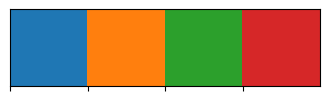

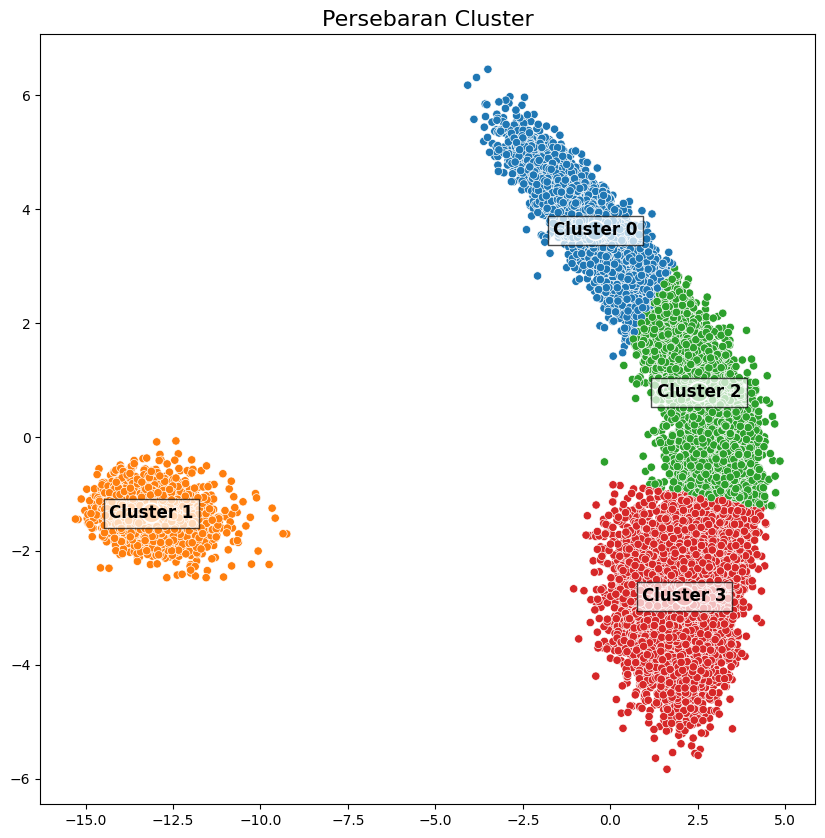

Silhouette Score: 0.5779


,short_name,Cluster,Position,sofifa_id,primary_position
0,L. Messi,3,Forward,158023,RW
1,R. Lewandowski,3,Forward,188545,ST
2,Cristiano Ronaldo,3,Forward,20801,ST
3,Neymar Jr,3,Forward,190871,LW
4,K. De Bruyne,3,Forward,192985,CM
...,...,...,...,...,...
19234,Song Defu,2,Balance,261962,CDM
19235,C. Porter,2,Balance,262040,CM
19236,N. Logue,2,Balance,262760,CM
19237,L. Rudden,3,Forward,262820,ST


Centroids of the clusters:
[[ -0.42270709   3.62486991]
 [-13.1113612   -1.33580294]
 [  2.53529523   0.78627028]
 [  2.12035047  -2.79521333]]


In [18]:
kmeansall = KMeans(n_cluster=4, random_state=42, max_iters=300, tol=0.0001)
kmeans_best_labelsall, kmeans_best_centroidsall = kmeansall.fit(dataall)

df_filteredall = df_filteredall.copy()  
df_filteredall['Cluster'] = kmeans_best_labelsall

cluster_to_position = {
    1: 'Goalkeeper', 
    0: 'Defender',    
    2: 'Balance',  
    3: 'Forward'
}

df_filteredall['Position'] = df_filteredall['Cluster'].map(cluster_to_position)
player_clustersall = df_filteredall[['short_name', 'Cluster','Position',"sofifa_id"]].copy()
player_clustersall['primary_position'] = q

from IPython.display import display
display(player_clustersall)

player_clustersall.to_csv('player_cluster_all.csv', index=False)
dump(kmeansall, 'kmeans_all.joblib')
print("Centroids of the clusters:")
print(kmeans_best_centroidsall)

80

Konvergen pada iterasi 8


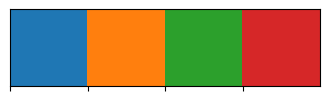

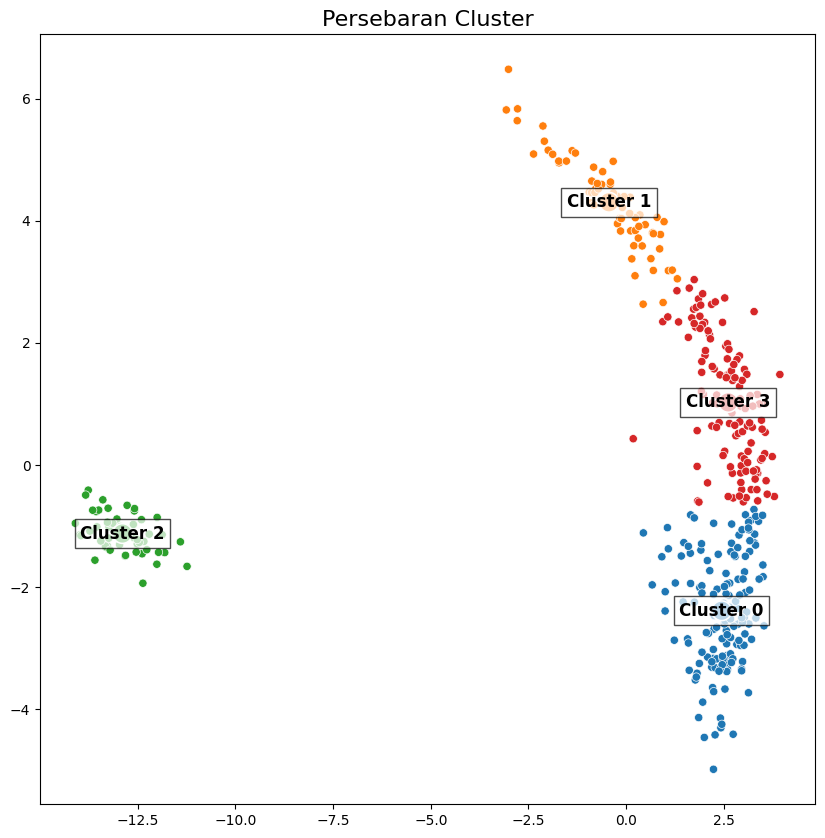

Silhouette Score: 0.6054


,sofifa_id,short_name,Position,Cluster,primary_position
0,158023,L. Messi,Forward,0,RW
1,188545,R. Lewandowski,Forward,0,ST
2,20801,Cristiano Ronaldo,Forward,0,ST
3,190871,Neymar Jr,Forward,0,LW
4,192985,K. De Bruyne,Forward,0,CM
...,...,...,...,...,...
383,245279,Reguilón,Goalkeeper,3,LB
384,247263,E. Tapsoba,Defender,1,CB
385,247394,D. Kulusevski,Forward,0,RW
386,251573,Renan Lodi,Goalkeeper,3,LB


Centroids of the clusters:
[[  2.44492635  -2.38572062]
 [ -0.43917682   4.3027119 ]
 [-12.89173088  -1.1217092 ]
 [  2.61296476   1.02585462]]


['kmeans_over_80.joblib']

In [19]:
from joblib import dump, load
kmeans = KMeans(n_cluster=4, random_state=42, max_iters=300, tol=0.0001)
kmeans_best_labels, kmeans_best_centroids = kmeans.fit(data)

df_filtered1 = df_filtered1.copy()  
df_filtered1['Cluster'] = kmeans_best_labels
cluster_to_position = {
    3: 'Goalkeeper', 
    1: 'Defender',    
    2: 'Balance',  
    0: 'Forward'
}

df_filtered1['Position'] = df_filtered1['Cluster'].map(cluster_to_position)

player_clusters = df_filtered1[["sofifa_id",'short_name', 'Position','Cluster']].copy()
player_clusters['primary_position'] = q

from IPython.display import display
display(player_clusters)

player_clusters.to_csv('player_cluster.csv', index=False)

print("Centroids of the clusters:")
print(kmeans_best_centroids)
dump(kmeans, 'kmeans_over_80.joblib')


60 - 80

Konvergen pada iterasi 25


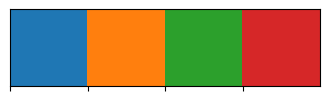

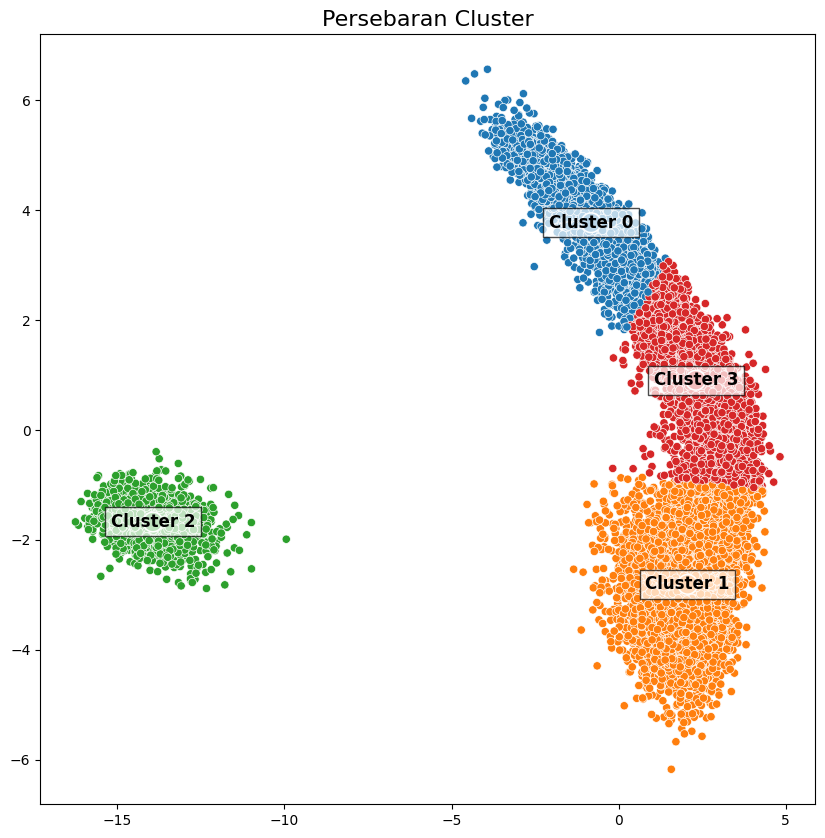

Silhouette Score: 0.5718


,sofifa_id,short_name,Position,Cluster,primary_position
388,1179,G. Buffon,Defender,2,GK
389,140233,G. Ochoa,Defender,2,GK
390,148119,I. Akinfeev,Defender,2,GK
391,162347,João Moutinho,Balance,3,CM
392,169588,J. Evans,Forward,0,CB
...,...,...,...,...,...
15164,264531,P. Galindo,Balance,3,LB
15165,264535,D. Agudelo,Defender,2,GK
15166,264546,L. Mosquera,Balance,3,LB
15167,264589,L. Gechter,Forward,0,CB


Centroids of the clusters:
[[ -0.82482398   3.7701019 ]
 [  2.06471555  -2.80819695]
 [-13.93611706  -1.67340156]
 [  2.30854995   0.90477503]]


['kmeans_60-80.joblib']

In [20]:
from joblib import dump, load
kmeans2 = KMeans(n_cluster=4, random_state=42, max_iters=300, tol=0.0001)
kmeans_best_labels2, kmeans_best_centroids2 = kmeans2.fit(data2)

df_filtered2 = df_filtered2.copy()  
df_filtered2['Cluster'] = kmeans_best_labels2
cluster_to_position2 = {
    1: 'Goalkeeper', 
    2: 'Defender',    
    3: 'Balance',  
    0: 'Forward'
}

df_filtered2['Position'] = df_filtered2['Cluster'].map(cluster_to_position2)
player_clusters2 = df_filtered2[["sofifa_id",'short_name', 'Position','Cluster']].copy()
player_clusters2['primary_position'] = q

from IPython.display import display
display(player_clusters2)

player_clusters2.to_csv('player_cluster2.csv', index=False)

print("Centroids of the clusters:")
print(kmeans_best_centroids2)
dump(kmeans2, 'kmeans_60-80.joblib')

40-60

Konvergen pada iterasi 13


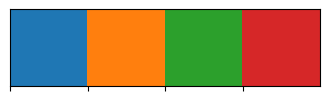

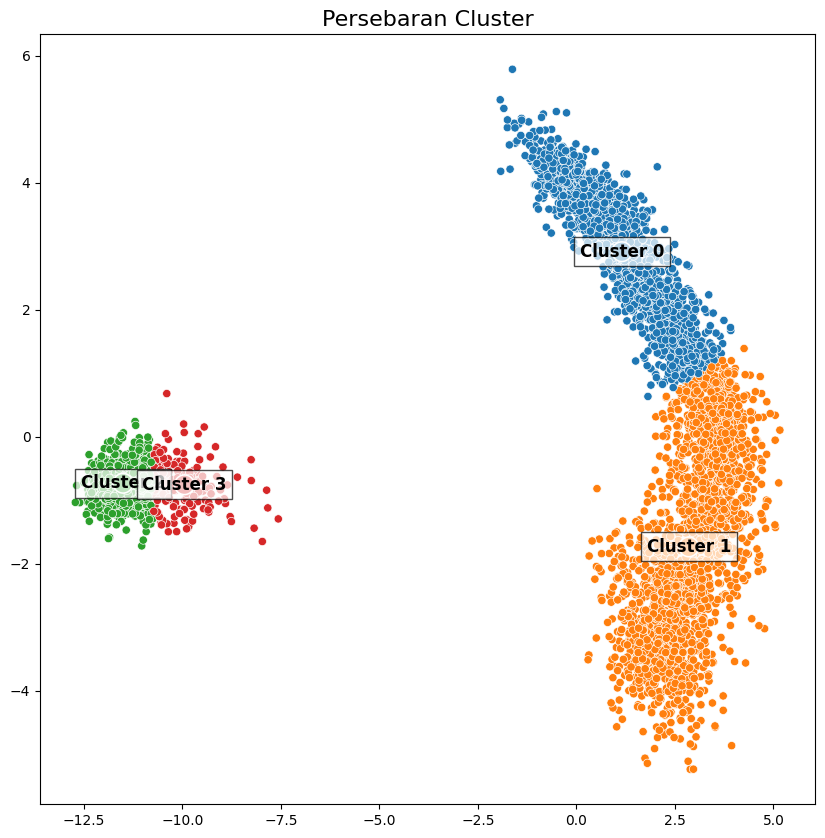

Silhouette Score: 0.5638


,sofifa_id,short_name,Position,Cluster,primary_position
15169,139475,G. Halford,Balance,1,CDM
15170,139476,D. Gerken,Goalkeeper,3,GK
15171,149825,D. Murphy,Balance,1,ST
15172,152523,S. Flinders,Goalkeeper,3,GK
15173,158305,Liu Jian,Balance,1,CB
...,...,...,...,...,...
19234,261962,Song Defu,Balance,1,CDM
19235,262040,C. Porter,Balance,1,CM
19236,262760,N. Logue,Balance,1,CM
19237,262820,L. Rudden,Balance,1,ST


Centroids of the clusters:
[[  1.15187798   2.91363649]
 [  2.85237499  -1.7369911 ]
 [-11.50862226  -0.73416167]
 [ -9.95094018  -0.7578626 ]]


['kmeans_under_60.joblib']

In [ ]:
from joblib import dump, load
kmeans3 = KMeans(n_cluster=4, random_state=42, max_iters=300, tol=0.0001)
kmeans_best_labels3, kmeans_best_centroids3 = kmeans3.fit(data3)

df_filtered3 = df_filtered3.copy()  
df_filtered3['Cluster'] = kmeans_best_labels3
cluster_to_position3 = {
    3: 'Goalkeeper', 
    2: 'Defender',    
    1: 'Balance',  
    0: 'Forward'
}

df_filtered3['Position'] = df_filtered3['Cluster'].map(cluster_to_position3)
player_clusters3 = df_filtered3[["sofifa_id",'short_name', 'Position','Cluster']].copy()
player_clusters3['primary_position'] = q

from IPython.display import display
display(player_clusters3)

player_clusters3.to_csv('player_cluster3.csv', index=False)

print("Centroids of the clusters:")
print(kmeans_best_centroids3)
dump(kmeans, 'kmeans_under_60.joblib')

In [22]:
# Menghitung jumlah pemain dalam tiap cluster
cluster_counts = df_filtered1['Cluster'].value_counts().sort_index()

# Menampilkan jumlah pemain di setiap cluster
print(cluster_counts)


Cluster
0    147
1     65
2     51
3    125
Name: count, dtype: int64


In [23]:
# Menghitung jumlah pemain dalam tiap cluster
cluster_counts2 = df_filtered2['Cluster'].value_counts().sort_index()

# Menampilkan jumlah pemain di setiap cluster
print(cluster_counts2)


Cluster
0    3146
1    5045
2    1418
3    5172
Name: count, dtype: int64


In [24]:
# Menghitung jumlah pemain dalam tiap cluster
cluster_counts3 = df_filtered3['Cluster'].value_counts().sort_index()

# Menampilkan jumlah pemain di setiap cluster
print(cluster_counts3)


Cluster
0    1378
1    2029
2     499
3     164
Name: count, dtype: int64


1


In [25]:
import pandas as pd

# Membaca ketiga CSV
df1 = pd.read_csv('player_cluster.csv')
df2 = pd.read_csv('player_cluster2.csv')
df3 = pd.read_csv('player_cluster3.csv')

# Menggabungkan DataFrame secara vertikal (menambah baris)
combined_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

# Menyimpan hasil gabungan ke dalam file CSV
combined_df.to_csv('gabungan_player.csv', index=False)


In [26]:
# import pandas as pd

# # Membaca file CSV pertama
# player_df0 = pd.read_csv('Player_22_Features.csv')

# # Membaca file CSV kedua yang berisi kolom baru
# new_columns_df = pd.read_csv('players_22.csv')

# # Daftar kolom yang ingin digabungkan dari new_columns_df
# columns_to_merge = [
#     "primary_position", "skill_moves", "pace", "shooting", "passing", "dribbling",
#     "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
#     "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
#     "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
#     "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
#     "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
#     "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
#     "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
#     "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
#     "goalkeeping_reflexes","weak_foot","work_rate"
# ]
# pp=["short_name","club_name","league_name","overall","primary_position"]
# # Pilih hanya kolom yang ada di columns_to_merge pada new_columns_df
# new_columns_df_selected = new_columns_df[columns_to_merge]
# popo=player_df0[pp]
# # Menggabungkan player_df0 dengan new_columns_df_selected
# combined_df = pd.concat([popo, new_columns_df_selected], axis=1)

# # Menyimpan hasil gabungan ke dalam file CSV baru
# combined_df.to_csv('Player_22_Features.csv', index=False)


In [27]:
import pandas as pd
import itertools
import pandas as pd
import pandas as pd



# Load the player dataset
player_df0 = pd.read_csv('Player_22_New.csv')

# Define the selected features to include in the new CSV file
selected_features = [
    "skill_moves", "pace", "shooting", "passing", "dribbling", "skill_moves",
    "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
    "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
    "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
    "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
    "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
    "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
    "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
    "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
    "goalkeeping_reflexes", "weak_foot", "work_rate", "short_name", "club_name", "league_name","overall","primary_position"
]

player_df = player_df0[selected_features]


cluster_df = pd.read_csv('gabungan_player.csv')  

player_df = player_df.merge(cluster_df, on='short_name')
player_df = player_df.sort_values(by=['overall'], ascending=[False])

print("Pilih formasi:")
print("1. 4-3-3")
print("2. 4-4-2")
print("3. 4-1-4-1")
formasi_input = int(input("Masukkan pilihan formasi (1/2/3): "))

if formasi_input == 1:
    formasi = {'Goalkeeper': 1, 'Defender': 4, 'Balance': 3, 'Forward': 3}
elif formasi_input == 2:
    formasi = {'Goalkeeper': 1, 'Defender': 4, 'Balance': 4, 'Forward': 2}
elif formasi_input == 3:
    formasi = {'Goalkeeper': 1, 'Defender': 4, 'Balance': 5, 'Forward': 1}
else:
    print("Pilihan tidak valid! Menggunakan formasi default 4-3-3.")
    formasi = {'Goalkeeper': 1, 'Defender': 4, 'Balance': 3, 'Forward': 3}

def calculate_player_value(player, position):
    if position == 'Goalkeeper':
        features = [
            'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes',
            'power_jumping', 'mentality_composure', 'skill_long_passing'
        ]
    elif position == 'Defender':
        features = [
            'defending', 'defending_marking_awareness', 'defending_standing_tackle',
            'defending_sliding_tackle', 'physic',
            'mentality_aggression', 'mentality_interceptions', 'power_strength',
            'power_jumping', 'power_stamina', 'attacking_short_passing'
        ]
    elif position == 'Balance':
        features = [
            'passing', 'dribbling', 'movement_agility', 'movement_reactions',
            'attacking_short_passing', 'skill_long_passing', 'skill_curve',
            'skill_dribbling', 'skill_ball_control', 'mentality_interceptions',
            'defending_marking_awareness', 'mentality_vision', 'mentality_composure',
            'mentality_aggression', 'movement_balance', 'power_stamina', 'power_strength'
        ]
    elif position == 'Forward':
        features = [
            'shooting', 'attacking_finishing', 'attacking_heading_accuracy',
            'power_shot_power', 'movement_acceleration', 'attacking_volleys',
            'skill_moves', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
            'skill_ball_control', 'movement_sprint_speed', 'movement_agility',
            'movement_reactions', 'power_long_shots', 'power_jumping',
            'mentality_positioning', 'mentality_vision'
        ]

    return player[features].mean()  


club_name = input("Masukkan nama klub: ")
club_players = player_df[player_df['club_name'] == club_name]

def brute_force_selection(eligible_players, count):
    if len(eligible_players) < count:
        return eligible_players

    all_combinations = itertools.combinations(eligible_players, count)
    best_combination = None
    best_value = -float('inf')

    for combination in all_combinations:
        total_value = sum(player[1] for player in combination)
        if total_value > best_value:
            best_value = total_value
            best_combination = combination
    
    return best_combination

lineup = {}
used_players = set()  

for position, count in formasi.items():
    eligible_players = club_players[
        (club_players['Position'] == position) & 
        (~club_players['short_name'].isin(used_players))]

    players_with_value = []
    for pl, player in eligible_players.iterrows():
        value = calculate_player_value(player, position)
        players_with_value.append((player['short_name'], value))

    selected_players = brute_force_selection(players_with_value, count)
    if len(selected_players) < count:
        remaining_count = count - len(selected_players)
        additional_players = club_players[
            (~club_players['short_name'].isin(used_players)) & 
            (~club_players['Position'].isin([position]))]

        additional_players_with_value = []
        for _, player in additional_players.iterrows():
            value = calculate_player_value(player, position)
            additional_players_with_value.append((player['short_name'], value))

        additional_selected = sorted(additional_players_with_value, key=lambda x: x[1], reverse=True)[:remaining_count]
        selected_players += additional_selected

    for player in selected_players:
        used_players.add(player[0])
    lineup[position] = club_players[club_players['short_name'].isin([player[0] for player in selected_players])]

final_lineup = pd.concat(lineup.values())

print(f"Lineup terbaik untuk klub {club_name} ({'-'.join(map(str, formasi.values()))}):\n")
print(final_lineup[['short_name', 'Position', 'overall']])



Pilih formasi:
1. 4-3-3
2. 4-4-2
3. 4-1-4-1


ValueError: invalid literal for int() with base 10: ''

In [62]:
# import pandas as pd
# from joblib import load

# # Muat model RandomForestRegressor dan KMeans
# random_forest_model = load('best_rf_model.joblib')
# kmeans_model80 = load('kmeans_over_80.joblib')
# kmeans_model6080 = load('kmeans_60-80.joblib')
# kmeans_model60 = load('kmeans_under_60.joblib')
# Scalerrandomforest=load("scalerrandomforest.joblib")
# scaler80=load("standardsclae80.joblib")
# scaler6080=load("standardsclae6080.joblib")
# scaler60=load("standardsclae60.joblib")
# pca80=load("pca80.joblib")
# pca6080=load('pca6080.joblib')
# pca60=load("pca60.joblib")

# # Mapping untuk fitur kategori
# work_rate_mapping = {
#     'Medium/Low': 0,
#     'High/Medium': 1,
#     'High/Low': 2,
#     'High/High': 3,
#     'Medium/Medium': 4,
#     'Medium/High': 5,
#     'Low/High': 6,
#     'Low/Medium': 7,
#     'Low/Low': 8
# }
# scale_map = {0: 0, 1: 20, 2: 40, 3: 60, 4: 80, 5: 100}

# input_data = {
#     'short_name': 'asep',
#     'club_name': 'Manchester United',
#     'league_name': 'Premier League',
#     'skill_moves': 5,
#     'pace': 85,
#     'shooting': 92,
#     'dribbling':95,
#     'passing': 91,
#     'defending': 34,
#     'physic': 90,
#     'attacking_crossing': 85,
#     'attacking_finishing': 95,
#     'attacking_heading_accuracy': 70,
#     'attacking_short_passing': 91,
#     'attacking_volleys':88,
#     'skill_dribbling': 96,
#     'skill_curve': 93,
#     'skill_fk_accuracy': 94,
#     'skill_long_passing': 91,
#     'skill_ball_control': 96,
#     'movement_acceleration': 91,
#     'movement_sprint_speed': 80,
#     'movement_agility': 91,
#     'movement_reactions': 94,
#     'movement_balance': 95,
#     'power_shot_power': 86,
#     'power_jumping': 68,
#     'power_stamina': 72,
#     'power_strength': 69,
#     'power_long_shots': 94,
#     'mentality_aggression':44,
#     'mentality_interceptions': 40,
#     'mentality_positioning': 93,
#     'mentality_vision': 95,
#     'mentality_penalties': 75,
#     'mentality_composure': 96,
#     'defending_marking_awareness': 20,
#     'defending_standing_tackle': 35,
#     'defending_sliding_tackle': 24,
#     'goalkeeping_diving': 60,
#     'goalkeeping_handling': 71,
#     'goalkeeping_kicking': 75,
#     'goalkeeping_positioning': 74,
#     'goalkeeping_reflexes': 58,
#     'weak_foot': 4,
#     'work_rate': 'Medium/Low'
# }



# # Input data secara manual
# # input_data = {
# #     'short_name': input("Short Name: "),
# #     'club_name': input("Club Name: "),
# #     '_league_name': input("League Name: "),
# #     'skill_moves': int(input("Skill Moves (0-5): ")),
# #     'pace': float(input("Pace: ")),
# #     'shooting': float(input("Shooting: ")),
# #     'passing': float(input("Passing: ")),
# #     'dribbling': float(input("Dribbling: ")),
# #     'defending': float(input("Defending: ")),
# #     'physic': float(input("Physic: ")),
# #     'attacking_crossing': float(input("Attacking Crossing: ")),
# #     'attacking_finishing': float(input("Attacking Finishing: ")),
# #     'attacking_heading_accuracy': float(input("Attacking Heading Accuracy: ")),
# #     'attacking_short_passing': float(input("Attacking Short Passing: ")),
# #     'attacking_volleys': float(input("Attacking Volleys: ")),
# #     'skill_dribbling': float(input("Skill Dribbling: ")),
# #     'skill_curve': float(input("Skill Curve: ")),
# #     'skill_fk_accuracy': float(input("Skill FK Accuracy: ")),
# #     'skill_long_passing': float(input("Skill Long Passing: ")),
# #     'skill_ball_control': float(input("Skill Ball Control: ")),
# #     'movement_acceleration': float(input("Movement Acceleration: ")),
# #     'movement_sprint_speed': float(input("Movement Sprint Speed: ")),
# #     'movement_agility': float(input("Movement Agility: ")),
# #     'movement_reactions': float(input("Movement Reactions: ")),
# #     'movement_balance': float(input("Movement Balance: ")),
# #     'power_shot_power': float(input("Power Shot Power: ")),
# #     'power_jumping': float(input("Power Jumping: ")),
# #     'power_stamina': float(input("Power Stamina: ")),
# #     'power_strength': float(input("Power Strength: ")),
# #     'power_long_shots': float(input("Power Long Shots: ")),
# #     'mentality_aggression': float(input("Mentality Aggression: ")),
# #     'mentality_interceptions': float(input("Mentality Interceptions: ")),
# #     'mentality_positioning': float(input("Mentality Positioning: ")),
# #     'mentality_vision': float(input("Mentality Vision: ")),
# #     'mentality_penalties': float(input("Mentality Penalties: ")),
# #     'mentality_composure': float(input("Mentality Composure: ")),
# #     'defending_marking_awareness': float(input("Defending Marking Awareness: ")),
# #     'defending_standing_tackle': float(input("Defending Standing Tackle: ")),
# #     'defending_sliding_tackle': float(input("Defending Sliding Tackle: ")),
# #     'goalkeeping_diving': float(input("Goalkeeping Diving: ")),
# #     'goalkeeping_handling': float(input("Goalkeeping Handling: ")),
# #     'goalkeeping_kicking': float(input("Goalkeeping Kicking: ")),
# #     'goalkeeping_positioning': float(input("Goalkeeping Positioning: ")),
# #     'goalkeeping_reflexes': float(input("Goalkeeping Reflexes: ")),
# #     'weak_foot': int(input("Weak Foot (0-5): ")),
# #     'work_rate': input("Work Rate (e.g., Medium/Low, High/Medium): ")
# # }

# # Buat DataFrame dari input
# test_data = pd.DataFrame([input_data])

# # Mapping kategori ke numerik
# test_data['skill_moves'] = test_data['skill_moves'].map(scale_map)
# test_data['weak_foot'] = test_data['weak_foot'].map(scale_map)
# test_data['work_rate'] = test_data['work_rate'].map(work_rate_mapping)

# # Langkah 1: Prediksi Overall dengan RandomForestRegressor
# fitur_random_forest = [
#     "skill_moves", "pace", "shooting", "passing", "dribbling", 
#     "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
#     "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
#     "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
#     "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
#     "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
#     "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
#     "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
#     "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
#     "goalkeeping_reflexes", "weak_foot", "work_rate"]


# X_random_forest = test_data[fitur_random_forest]
# X_random_forest = Scalerrandomforest.transform(X_random_forest)
# test_data['overall'] = np.ceil(random_forest_model.predict(X_random_forest)).astype(int)
# print(test_data['overall'])
# # Langkah 2: Normalisasi untuk KMeans
# fitur_kmeans = [feature for feature in fitur_random_forest if feature not in ["weak_foot"]]
# for feature in fitur_kmeans:
#     test_data[f'{feature}_normalized'] = test_data[feature] / test_data['overall']

# normalized_features = [f"{feature}_normalized" for feature in fitur_kmeans]
# X_kmeans = test_data[normalized_features]

# if test_data['overall'].iloc[0] > 80:
#     cluster_to_position = {
#     3: 'Goalkeeper', 
#     1: 'Defender',    
#     2: 'Balance',  
#     0: 'Forward'}
#     X_kmeans80sc=scaler80.transform(X_kmeans)
#     X_kmeans80=pca80.transform(X_kmeans80sc)
#     U = np.transpose(pca80.components_)
#     C = pd.DataFrame(X_kmeans80sc.dot(U))
#     Datatest80 = C.iloc[:, [0, 1]]
#     test_data['kmeans_cluster'] = kmeans_model80.predict(Datatest80)
#     test_data['position']=test_data['kmeans_cluster'].map(cluster_to_position)

# elif test_data['overall'].iloc[0]  > 60 and test_data['overall'].iloc[0]  <= 80:
#     cluster_to_position2 = {
#     1: 'Goalkeeper', 
#     2: 'Defender',    
#     3: 'Balance',  
#     0: 'Forward'}
#     X_kmeans6080sc=scaler6080.transform(X_kmeans)
#     X_kmeans6080=pca6080.transform(X_kmeans6080sc)
#     U2 = np.transpose(pca6080.components_)
#     C2 = pd.DataFrame(X_kmeans6080sc.dot(U2))
#     Datatest6080 = C2.iloc[:, [0, 1]]
#     test_data['kmeans_cluster'] = kmeans_model6080.predict(Datatest6080)
#     test_data['position']=test_data['kmeans_cluster'].map(cluster_to_position2)

# elif test_data['overall'].iloc[0]  <= 60:
#     cluster_to_position3 = {
#     3: 'Goalkeeper', 
#     2: 'Defender',    
#     1: 'Balance',  
#     0: 'Forward'}
#     X_kmeans60sc=scaler60.transform(X_kmeans)
#     X_kmeans60=pca60.transform(X_kmeans60sc)
#     U3 = np.transpose(pca60.components_)
#     C3 = pd.DataFrame(X_kmeans60sc.dot(U3))
#     Datatest60 = C3.iloc[:, [0, 1]]
#     test_data['kmeans_cluster'] = kmeans_model60.predict(Datatest60)
#     test_data['position'] = test_data['kmeans_cluster'].map(cluster_to_position3)


# columns_to_drop = [f"{feature}_normalized" for feature in fitur_kmeans]
# test_data = test_data.drop(columns=columns_to_drop)
# # Simpan semua kolom input + hasil prediksi ke file
# output_file = 'hasil_prediksi_dengan_input.csv'
# test_data.to_csv(output_file, index=False)
# print(f"Hasil prediksi dengan semua input telah disimpan ke {output_file}")


In [ ]:
import pandas as pd
from joblib import load
import numpy as np

# Muat model RandomForestRegressor dan KMeans
random_forest_model = load('best_rf_model.joblib')
kmeans_model80 = load('kmeans_over_80.joblib')
kmeans_model6080 = load('kmeans_60-80.joblib')
kmeans_model60 = load('kmeans_under_60.joblib')
Scalerrandomforest = load("scalerrandomforest.joblib")
scaler80 = load("standardsclae80.joblib")
scaler6080 = load("standardsclae6080.joblib")
scaler60 = load("standardsclae60.joblib")
pca80 = load("pca80.joblib")
pca6080 = load('pca6080.joblib')
pca60 = load("pca60.joblib")

# Mapping untuk fitur kategori
work_rate_mapping = {
    'Medium/Low': 0,
    'High/Medium': 1,
    'High/Low': 2,
    'High/High': 3,
    'Medium/Medium': 4,
    'Medium/High': 5,
    'Low/High': 6,
    'Low/Medium': 7,
    'Low/Low': 8
}
scale_map = {0: 0, 1: 20, 2: 40, 3: 60, 4: 80, 5: 100}


def predik_overal_posisi(input_data):
    # Mapping kategori ke numerik
    input_data['skill_moves'] = scale_map[input_data['skill_moves']]  
    input_data['weak_foot'] = scale_map[input_data['weak_foot']]  
    input_data['work_rate'] = work_rate_mapping[input_data['work_rate']] 

    # Buat DataFrame dari input
    test_data = pd.DataFrame([input_data])

    # Langkah 1: Prediksi Overall dengan RandomForestRegressor
    fitur_random_forest = [
        "skill_moves", "pace", "shooting", "passing", "dribbling", 
        "defending", "physic", "attacking_crossing", "attacking_finishing", "attacking_heading_accuracy",
        "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy",
        "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed",
        "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping",
        "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions",
        "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure",
        "defending_marking_awareness", "defending_standing_tackle", "defending_sliding_tackle",
        "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning",
        "goalkeeping_reflexes", "weak_foot", "work_rate"]

    X_random_forest = test_data[fitur_random_forest]
    X_random_forest = Scalerrandomforest.transform(X_random_forest)
    test_data['overall'] = np.ceil(random_forest_model.predict(X_random_forest)).astype(int)

    # Langkah 2: Normalisasi untuk KMeans
    fitur_kmeans = [feature for feature in fitur_random_forest if feature not in ["weak_foot"]]
    for feature in fitur_kmeans:
        test_data[f'{feature}_normalized'] = test_data[feature] / test_data['overall']

    normalized_features = [f"{feature}_normalized" for feature in fitur_kmeans]
    X_kmeans = test_data[normalized_features]

    if test_data['overall'].iloc[0] > 80:
        cluster_to_position = {
            3: 'Goalkeeper', 
            1: 'Defender',    
            2: 'Balance',  
            0: 'Forward'}
        X_kmeans80sc = scaler80.transform(X_kmeans)
        X_kmeans80 = pca80.transform(X_kmeans80sc)
        U = np.transpose(pca80.components_)
        C = pd.DataFrame(X_kmeans80sc.dot(U))
        Datatest80 = C.iloc[:, [0, 1]]
        test_data['kmeans_cluster'] = kmeans_model80.predict(Datatest80)
        test_data['position'] = test_data['kmeans_cluster'].map(cluster_to_position)

    elif test_data['overall'].iloc[0] > 60 and test_data['overall'].iloc[0] <= 80:
        cluster_to_position2 = {
            1: 'Goalkeeper', 
            2: 'Defender',    
            3: 'Balance',  
            0: 'Forward'}
        X_kmeans6080sc = scaler6080.transform(X_kmeans)
        X_kmeans6080 = pca6080.transform(X_kmeans6080sc)
        U2 = np.transpose(pca6080.components_)
        C2 = pd.DataFrame(X_kmeans6080sc.dot(U2))
        Datatest6080 = C2.iloc[:, [0, 1]]
        test_data['kmeans_cluster'] = kmeans_model6080.predict(Datatest6080)
        test_data['position'] = test_data['kmeans_cluster'].map(cluster_to_position2)

    elif test_data['overall'].iloc[0] <= 60:
        cluster_to_position3 = {
            3: 'Goalkeeper', 
            2: 'Defender',    
            1: 'Balance',  
            0: 'Forward'}
        X_kmeans60sc = scaler60.transform(X_kmeans)
        X_kmeans60 = pca60.transform(X_kmeans60sc)
        U3 = np.transpose(pca60.components_)
        C3 = pd.DataFrame(X_kmeans60sc.dot(U3))
        Datatest60 = C3.iloc[:, [0, 1]]
        test_data['kmeans_cluster'] = kmeans_model60.predict(Datatest60)
        test_data['position'] = test_data['kmeans_cluster'].map(cluster_to_position3)

    # Drop kolom yang tidak diperlukan
    columns_to_drop = [f"{feature}_normalized" for feature in fitur_kmeans]
    test_data = test_data.drop(columns=columns_to_drop)

    return test_data


def masukkanpemain():

        try:
            existing_data = pd.read_csv('hasil_prediksi_dengan_input.csv')
        except FileNotFoundError:
            existing_data = pd.DataFrame()

        while True:
            input_data = {
                'short_name': input("Short Name: "),
                'club_name': input("Club Name: "),
                'league_name': input("League Name: "),
                'skill_moves': int(input("Skill Moves (0-5): ")),
                'pace': float(input("Pace: ")),
                'shooting': float(input("Shooting: ")),
                'dribbling': float(input("Dribbling: ")),
                'passing': float(input("Passing: ")),
                'defending': float(input("Defending: ")),
                'physic': float(input("Physic: ")),
                'attacking_crossing': float(input("Attacking Crossing: ")),
                'attacking_finishing': float(input("Attacking Finishing: ")),
                'attacking_heading_accuracy': float(input("Attacking Heading Accuracy: ")),
                'attacking_short_passing': float(input("Attacking Short Passing: ")),
                'attacking_volleys': float(input("Attacking Volleys: ")),
                'skill_dribbling': float(input("Skill Dribbling: ")),
                'skill_curve': float(input("Skill Curve: ")),
                'skill_fk_accuracy': float(input("Skill FK Accuracy: ")),
                'skill_long_passing': float(input("Skill Long Passing: ")),
                'skill_ball_control': float(input("Skill Ball Control: ")),
                'movement_acceleration': float(input("Movement Acceleration: ")),
                'movement_sprint_speed': float(input("Movement Sprint Speed: ")),
                'movement_agility': float(input("Movement Agility: ")),
                'movement_reactions': float(input("Movement Reactions: ")),
                'movement_balance': float(input("Movement Balance: ")),
                'power_shot_power': float(input("Power Shot Power: ")),
                'power_jumping': float(input("Power Jumping: ")),
                'power_stamina': float(input("Power Stamina: ")),
                'power_strength': float(input("Power Strength: ")),
                'power_long_shots': float(input("Power Long Shots: ")),
                'mentality_aggression': float(input("Mentality Aggression: ")),
                'mentality_interceptions': float(input("Mentality Interceptions: ")),
                'mentality_positioning': float(input("Mentality Positioning: ")),
                'mentality_vision': float(input("Mentality Vision: ")),
                'mentality_penalties': float(input("Mentality Penalties: ")),
                'mentality_composure': float(input("Mentality Composure: ")),
                'defending_marking_awareness': float(input("Defending Marking Awareness: ")),
                'defending_standing_tackle': float(input("Defending Standing Tackle: ")),
                'defending_sliding_tackle': float(input("Defending Sliding Tackle: ")),
                'goalkeeping_diving': float(input("Goalkeeping Diving: ")),
                'goalkeeping_handling': float(input("Goalkeeping Handling: ")),
                'goalkeeping_kicking': float(input("Goalkeeping Kicking: ")),
                'goalkeeping_positioning': float(input("Goalkeeping Positioning: ")),
                'goalkeeping_reflexes': float(input("Goalkeeping Reflexes: ")),
                'weak_foot': int(input("Weak Foot (0-5): ")),
                'work_rate': input("Work Rate (e.g., Medium/Low, High/Medium): ")
            }
            
            result = predik_overal_posisi(input_data)
            existing_data = pd.concat([existing_data, result], ignore_index=True)
            existing_data.to_csv('hasil_prediksi_dengan_input.csv', index=False)

            if input("Do you want to add another player? (y/n): ").lower() != 'y':
                break

masukkanpemain()


ValueError: invalid literal for int() with base 10: ''